## Analyzing Trends in ACS Data

The censusdis package only supports downloading data from one year at a time. Since I am interested in analyzing trends over time, I wrote a number of functions to make this easier. The primary functions are `download_multiyear` and `graph_multiyear`. This notebook demonstrates their usage.

The first ACS 5-year estimates were published in 2010. You are not supposed to compare years with overlapping data. This leaves us with 3 vintages to compare: 2010, 2015 and 2020. For this workbook I will be using [B05012: Nativity in the United States](https://data.census.gov/table/ACSDT5Y2020.B05012?g=9700000US3612510).

As a reminder, all code in this repo (including `utils.py`) is open source and released under the MIT License. Feel free to use it for your own project.

### Downloading Multiple Years of ACS Data 

The API to `download_multiyear` is designed to mirror that of `ced.download`, which was introduced in the previous notebook. The principal difference is that the second parameter is now a list of years.

In [2]:
from censusdis.datasets import ACS5 # type: ignore
from censusdis.states import NY # type: ignore

from utils import download_multiyear

df = download_multiyear(
    dataset=ACS5,
    vintages=[2010, 2015, 2020],
    group="B05012",
    state=NY,
    school_district_unified="12510",
)
df
# TODO: Add parameter like drop_columns that will drop all colummns that are not variables or 'Year'

	'Estimate!!Total' in [2010, 2015]
	'Estimate!!Total:' in [2020]
	'Estimate!!Total!!Native' in [2010, 2015]
	'Estimate!!Total:!!Native' in [2020]
	'Estimate!!Total!!Foreign-Born' in [2010, 2015]
	'Estimate!!Total:!!Foreign-Born' in [2020]


,STATE,SCHOOL_DISTRICT_UNIFIED,Total,Native,Foreign-Born,GEO_ID,NAME,Year
0,36,12510,43899,30699,13200,9700000US3612510,"Great Neck Union Free School District, New York",2010
0,36,12510,44975,29935,15040,9700000US3612510,"Great Neck Union Free School District, New York",2015
0,36,12510,46046,31638,14408,9700000US3612510,"Great Neck Union Free School District, New York",2020


In [4]:
[col for col in df.columns if col.startswith("B05012")]

['B05012_001E', 'B05012_002E', 'B05012_003E']

### Graphing Multiple Years of ACS Data

I created a function called `graph_ts_df` to simplify graphing the output of `get_ts_df`. 

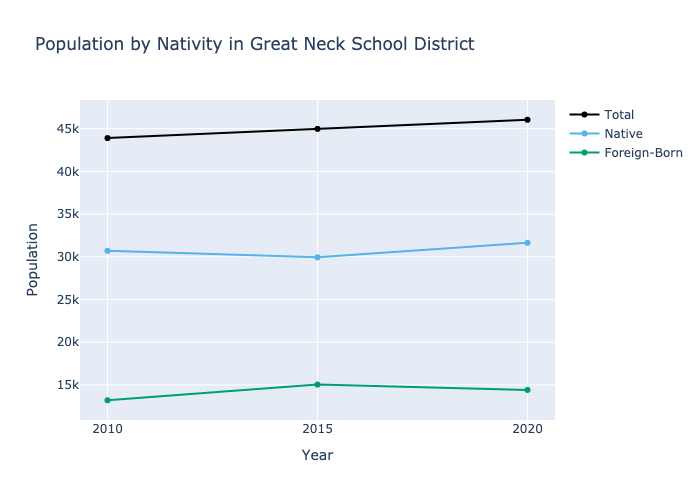

In [5]:
from utils import graph_ts_df

# TODO: The columns parameter here should be optional. 
# If None it should show all columns

graph_ts_df(
    df,
    ["Total", "Native", "Foreign-Born"],
    "Population by Nativity in Great Neck School District",
    "Population",
)